### Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)을 자르기
     - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
     - conda install -c anaconda pillow
     - pip install pillow
- 유투브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우져를 화면에 띄우지 않고 RAM영역에만 띄어서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용

In [3]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [5]:
!mkdir datas

In [36]:
url = "https://www.youtube.com/watch?v=cVEemOmHw9Y&t=100s"
driver = webdriver.Chrome()
driver.get(url)

In [38]:
try:
    driver.find_element_by_css_selector(".ytp-large-play-button.ytp-button").click()
except:
    pass

In [32]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

In [7]:
!ls datas

screenshot.png


(1200, 530)


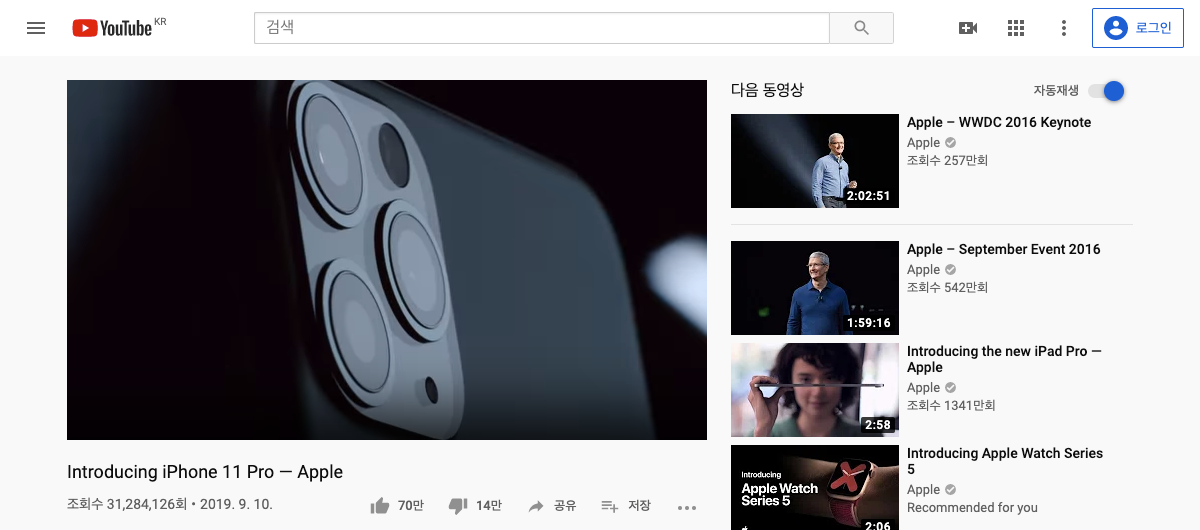

In [24]:
pil_img = pil.open("datas/screenshot.png")
print(pil_img.size)
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [9]:
driver = webdriver.Chrome()
driver.get(url)

In [10]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 67, 'y': 80} {'height': 360, 'width': 640}


In [33]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰 줘야 합니다.
left = location["x"]
top = location["y"]
right = left + size["width"]
bottom = top + size["height"]
area = (left, top, right, bottom)
area

(67, 80, 707, 440)

#### 3. 이미지를 pillow로 잘라주기

In [35]:
pil_element_img.size

(640, 360)

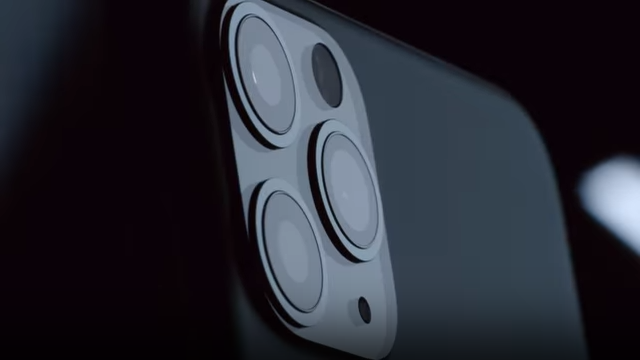

In [34]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [25]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [27]:
%ls datas

screenshot.png          screenshot_element.png


#### 썸네일 만들기 
- 원본 이미지를 다양한 사이즈로 축소하는 방법

In [28]:
pil_element_img.size

(704, 396)

(284, 160)


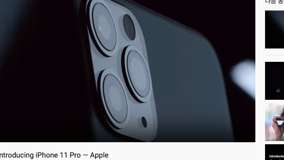

In [29]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

#### fake useragent

In [39]:
from fake_useragent import UserAgent

In [44]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36


In [72]:
UserAgent().chrome

'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.2309.372 Safari/537.36'

In [74]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.16 Safari/537.36


#### Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 실행하는 방법
- 크롬 버전 60 이상에서만 사용이 가능
- window 화면이 지원되지 않는 환경에서 사용

In [75]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

패스트캠퍼스 | 커리어 성장을 위한 최고의 실무교육 아카데미


#### 영상 파일 다운로드
- www. -> ss 로 변경하면 다운 로드 받을수 있는 사이트에 접속

In [86]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [77]:
url = "https://www.youtube.com/watch?v=cVEemOmHw9Y"

In [82]:
link = "https://r1---sn-o0n5oxu-hxne.googlevideo.com/videoplayback?expire=1574331843&ei=YxHWXYf9CMbJogOk0ZTABg&ip=202.162.195.77&id=o-AMsj1HLS6vxK2hfzV6EBH8V0Paio60c6KtRQkB-E9yh1&itag=22&source=youtube&requiressl=yes&mm=31%2C29&mn=sn-o0n5oxu-hxne%2Csn-poqvn5u-jb3d&ms=au%2Crdu&mv=m&mvi=0&pl=24&initcwndbps=380000&mime=video%2Fmp4&ratebypass=yes&dur=182.044&lmt=1568144974157526&mt=1574310117&fvip=1&fexp=23842630%2C23860863&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRgIhAK6XlZNlMQU0Irla5EJm6UDDImO9rN92GSeh9_Qvx-jJAiEArW5IAvU2FfY0bszC2n30ma5gpa09q-08cumsyMjkES0%3D&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AHylml4wRAIgL-Bahe7v5K61pMNX9Z-MNoLU2mUtMe_WursyyieLUW0CIGRqzhPKuekc58Sts4h7nJ9jOqBOwiPTZ4QvA4A5OGH0&video_id=cVEemOmHw9Y&title=Introducing+iPhone+11+Pro+%E2%80%94+Apple"

In [87]:
title = "Apple_September_Event_2016.mp4"
size = download(title, link)
print("{} Mb".format(round(size/1024/1024,2)))

12.3 Mb
